In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib notebook
import numpy as np
import seaborn as sns

In [2]:
base_censo = pd.read_csv('census.csv')
base_censo.head()

,age,workclass,final-weight,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loos,hour-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [3]:
base_censo.describe()

,age,final-weight,education-num,capital-gain,capital-loos,hour-per-week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [4]:
base_censo.isnull().sum()

age               0
workclass         0
final-weight      0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loos      0
hour-per-week     0
native-country    0
income            0
dtype: int64

##### Visualização de dados

In [5]:
np.unique(base_censo['income'], return_counts = True)

(array([' <=50K', ' >50K'], dtype=object), array([24720,  7841], dtype=int64))

<IPython.core.display.Javascript object>


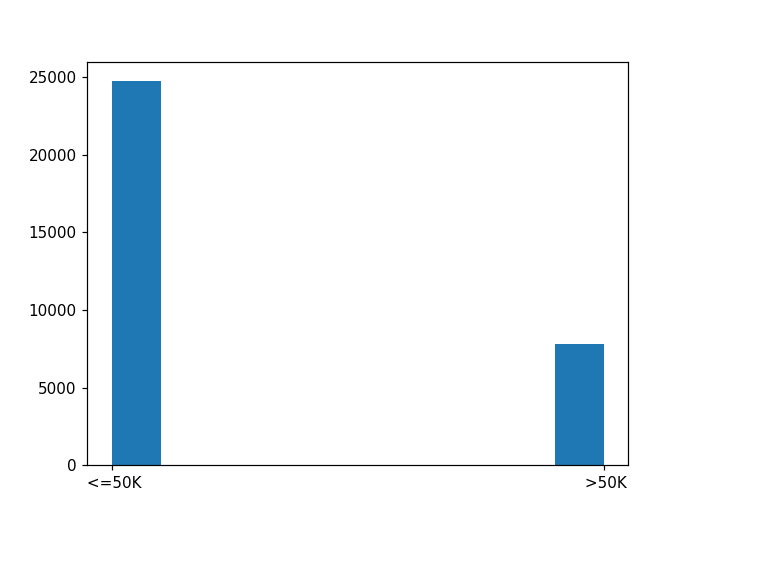

In [22]:
plt.hist(x = base_censo['income']);
plt.show()

<IPython.core.display.Javascript object>


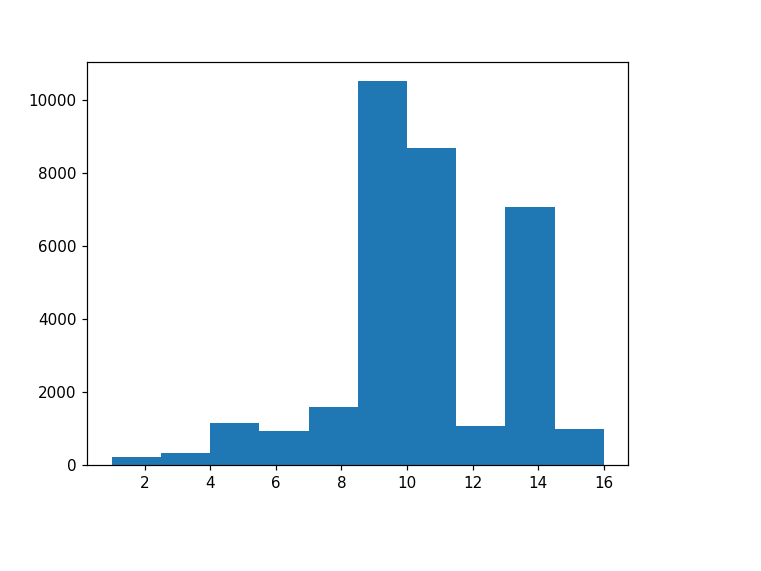

In [23]:
plt.hist(x= base_censo['education-num'])
plt.show()

<IPython.core.display.Javascript object>


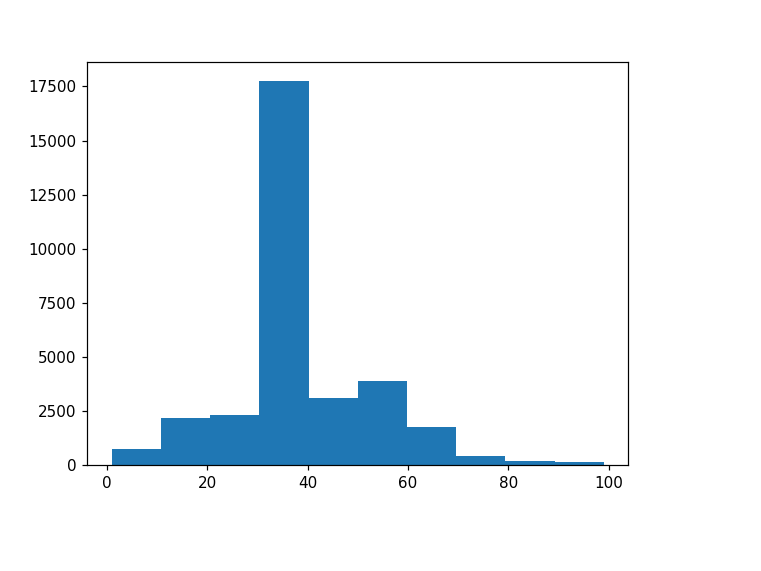

In [24]:
plt.hist(x = base_censo['hour-per-week'])
plt.show()

##### Divisão entre previsores e classes

In [9]:
Xcenso = base_censo.iloc[:, 0:14].values
Xcenso

array([[39, ' State-gov', 77516, ..., 0, 40, ' United-States'],
       [50, ' Self-emp-not-inc', 83311, ..., 0, 13, ' United-States'],
       [38, ' Private', 215646, ..., 0, 40, ' United-States'],
       ...,
       [58, ' Private', 151910, ..., 0, 40, ' United-States'],
       [22, ' Private', 201490, ..., 0, 20, ' United-States'],
       [52, ' Self-emp-inc', 287927, ..., 0, 40, ' United-States']],
      dtype=object)

In [10]:
Ycenso = base_censo.iloc[:,14].values
Ycenso

array([' <=50K', ' <=50K', ' <=50K', ..., ' <=50K', ' <=50K', ' >50K'],
      dtype=object)

##### Tratando dados categoricos

###### LabelEncoder

In [11]:
from sklearn.preprocessing import LabelEncoder

In [12]:
label_enconder = LabelEncoder()

In [13]:
teste = label_enconder.fit_transform(Xcenso[:, 1])
teste

array([7, 6, 4, ..., 4, 4, 5])

In [14]:
label_encoder_workclass = LabelEncoder()
label_encoder_education = LabelEncoder()
label_encoder_martial = LabelEncoder()
label_encoder_occupation = LabelEncoder()
label_encoder_relationship = LabelEncoder()
label_encoder_race = LabelEncoder()
label_encoder_sex = LabelEncoder()
label_encoder_contry = LabelEncoder()

In [15]:
Xcenso[0]

array([39, ' State-gov', 77516, ' Bachelors', 13, ' Never-married',
       ' Adm-clerical', ' Not-in-family', ' White', ' Male', 2174, 0, 40,
       ' United-States'], dtype=object)

In [16]:
Xcenso[:, 1] = label_encoder_workclass.fit_transform(Xcenso[:, 1])
Xcenso[:, 3] = label_encoder_education.fit_transform(Xcenso[:, 3])
Xcenso[:, 5] = label_encoder_martial.fit_transform(Xcenso[:, 5])
Xcenso[:, 6] = label_encoder_occupation.fit_transform(Xcenso[:, 6])
Xcenso[:, 7] = label_encoder_relationship.fit_transform(Xcenso[:, 7])
Xcenso[:, 8] = label_encoder_race.fit_transform(Xcenso[:, 8])
Xcenso[:, 9] = label_encoder_sex.fit_transform(Xcenso[:, 9])
Xcenso[:, 13] = label_encoder_contry.fit_transform(Xcenso[:, 13])

In [17]:
Xcenso

array([[39, 7, 77516, ..., 0, 40, 39],
       [50, 6, 83311, ..., 0, 13, 39],
       [38, 4, 215646, ..., 0, 40, 39],
       ...,
       [58, 4, 151910, ..., 0, 40, 39],
       [22, 4, 201490, ..., 0, 20, 39],
       [52, 5, 287927, ..., 0, 40, 39]], dtype=object)

###### OneHotEncoder

In [18]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

In [19]:
onehotconder_censo = ColumnTransformer(transformers = [('OneHot', OneHotEncoder(), [1,3,5,6,7,8,9,13])], remainder ='passthrough')

In [20]:
Xcenso = onehotconder_censo.fit_transform(Xcenso).toarray()

In [21]:
Xcenso.shape

(32561, 108)

#### Escalonamento de valores

In [26]:
from sklearn.preprocessing import StandardScaler
scaler_censo = StandardScaler()
Xcenso = scaler_censo.fit_transform(Xcenso)

In [27]:
Xcenso[0]

array([-0.2444502 , -0.17429511, -0.26209736, -0.01466381, -1.5167923 ,
       -0.18838933, -0.29093568,  4.90769968, -0.02073999, -0.17175325,
       -0.19348662, -0.11609195, -0.07201601, -0.10164955, -0.1422718 ,
       -0.12664495, -0.18406376, -0.21053433,  2.25399324, -0.11334387,
       -0.68994199, -0.23637391, -0.03960742, -0.13419553, -0.53714425,
       -0.39750806, -0.02658695, -0.92284068, -0.11403678,  1.43105786,
       -0.1802846 , -0.17735813, -0.24494366,  2.76348874, -0.01662771,
       -0.37949517, -0.37774555, -0.17745022, -0.20957797, -0.25595432,
       -0.33554133, -0.06780164, -0.38166338, -0.14260848, -0.35531609,
       -0.17127887, -0.22710355, -0.82533335,  1.70899099, -0.17624972,
       -0.42934582, -0.34403232, -0.22492681, -0.09820087, -0.18155194,
       -0.32576824, -0.09161163,  0.4130197 , -0.70307135,  0.70307135,
       -0.13502327, -0.02416321, -0.06107342, -0.0480488 , -0.04260602,
       -0.05409379, -0.04641598, -0.02933708, -0.05714946, -0.05

#### Divisão de dados para treino e testes

In [29]:
from sklearn.model_selection import train_test_split

In [30]:
Xtrein_censo, Xtest_censo, Ytrein_censo, Ytest_censo = train_test_split(Xcenso, Ycenso, test_size =0.25, random_state = 0)

In [31]:
import pickle

In [32]:
 with open ('censo.pkl', mode = 'wb') as f:
        pickle.dump([Xtrein_censo, Xtest_censo, Ytrein_censo, Ytest_censo], f)